# Predicting Air Quality

Dataset: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment/code

## Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
air = pd.read_csv("updated_pollution_dataset.csv")
df = air.copy()

In [4]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
df.shape

(5000, 10)

In [7]:
df.nunique()

Temperature                      362
Humidity                         723
PM2.5                            815
PM10                             955
NO2                              445
SO2                              348
CO                               265
Proximity_to_Industrial_Areas    179
Population_Density               683
Air Quality                        4
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,30.029020,6.720661,13.40,25.10,29.00,34.000,58.60
Humidity,5000.0,70.056120,15.863577,36.00,58.30,69.80,80.300,128.10
PM2.5,5000.0,20.142140,24.554546,0.00,4.60,12.00,26.100,295.00
PM10,5000.0,30.218360,27.349199,-0.20,12.30,21.70,38.100,315.80
NO2,5000.0,26.412100,8.895356,7.40,20.10,25.30,31.900,64.90
SO2,5000.0,10.014820,6.750303,-6.20,5.10,8.00,13.725,44.90
CO,5000.0,1.500354,0.546027,0.65,1.03,1.41,1.840,3.72
Proximity_to_Industrial_Areas,5000.0,8.425400,3.610944,2.50,5.40,7.90,11.100,25.80
Population_Density,5000.0,497.423800,152.754084,188.00,381.00,494.00,600.000,957.00


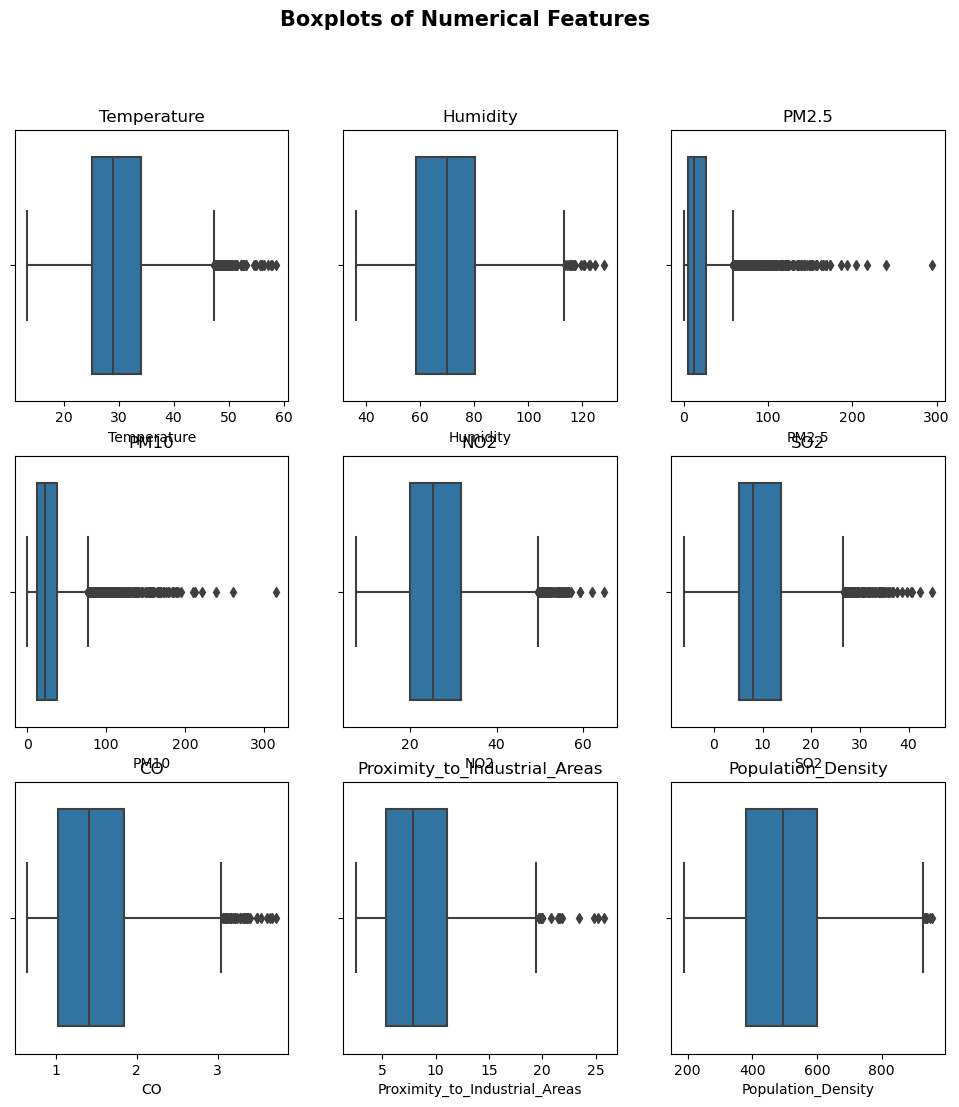

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, column in enumerate(df.select_dtypes(include=["float64", "int64"])):
    sns.boxplot(x=df[column], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(column)
    
plt.suptitle("Boxplots of Numerical Features", fontsize=15, fontweight="bold")
plt.show()

We have some outliers as it seems. Let's handle them.

In [10]:
for column in df.select_dtypes(include=["float64", "int64"]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,29.977300,6.562749,13.40,25.10,29.00,34.000,47.3500
Humidity,5000.0,70.036240,15.804219,36.00,58.30,69.80,80.300,113.3000
PM2.5,5000.0,17.993440,17.198269,0.00,4.60,12.00,26.100,58.3500
PM10,5000.0,28.215900,20.602156,-0.20,12.30,21.70,38.100,76.8000
NO2,5000.0,26.364280,8.753225,7.40,20.10,25.30,31.900,49.6000
SO2,5000.0,9.911630,6.430183,-6.20,5.10,8.00,13.725,26.6625
CO,5000.0,1.498345,0.539610,0.65,1.03,1.41,1.840,3.0550
Proximity_to_Industrial_Areas,5000.0,8.419160,3.587946,2.50,5.40,7.90,11.100,19.6500
Population_Density,5000.0,497.406700,152.704773,188.00,381.00,494.00,600.000,928.5000


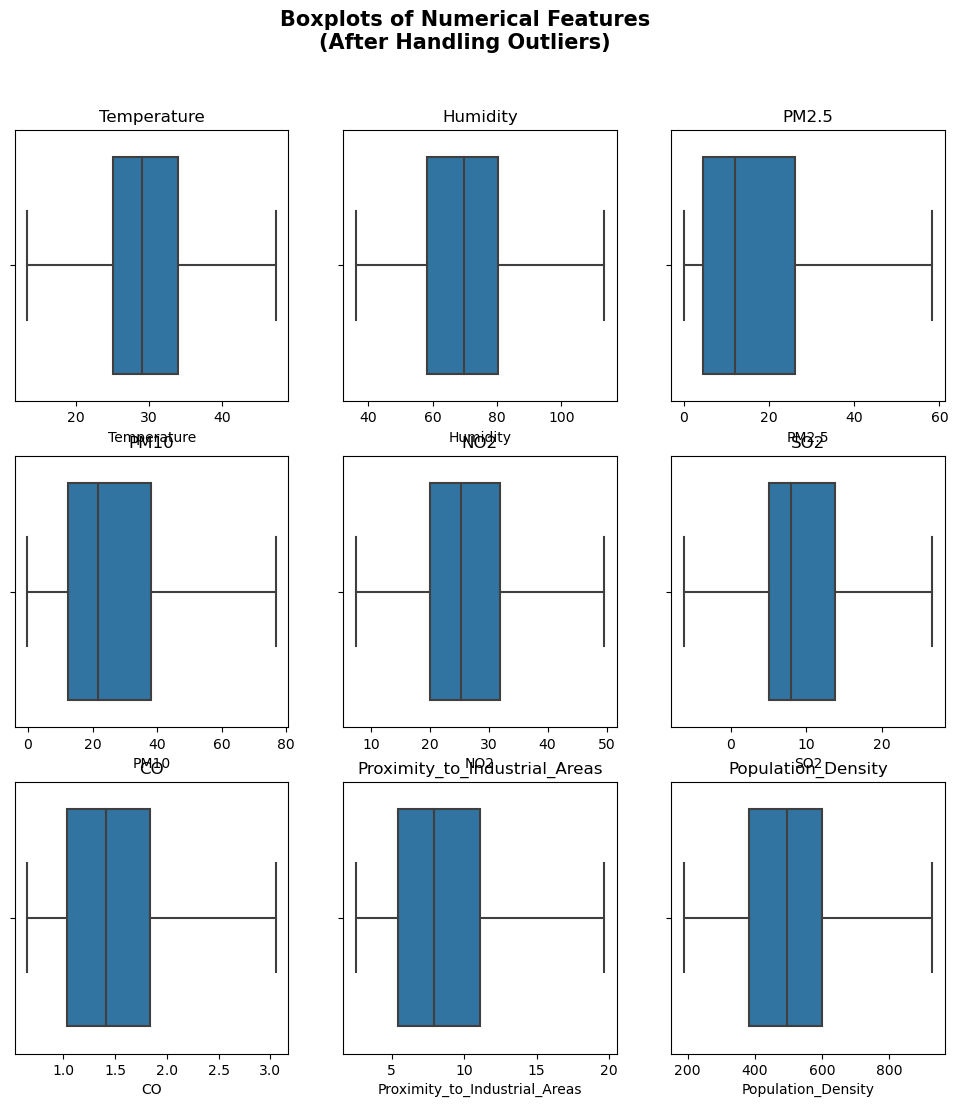

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, column in enumerate(df.select_dtypes(include=["float64", "int64"])):
    sns.boxplot(x=df[column], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(column)
    
plt.suptitle("Boxplots of Numerical Features\n(After Handling Outliers)", fontsize=15, fontweight="bold")
plt.show()

## Visual Analysis

In [13]:
df.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density               float64
Air Quality                       object
dtype: object

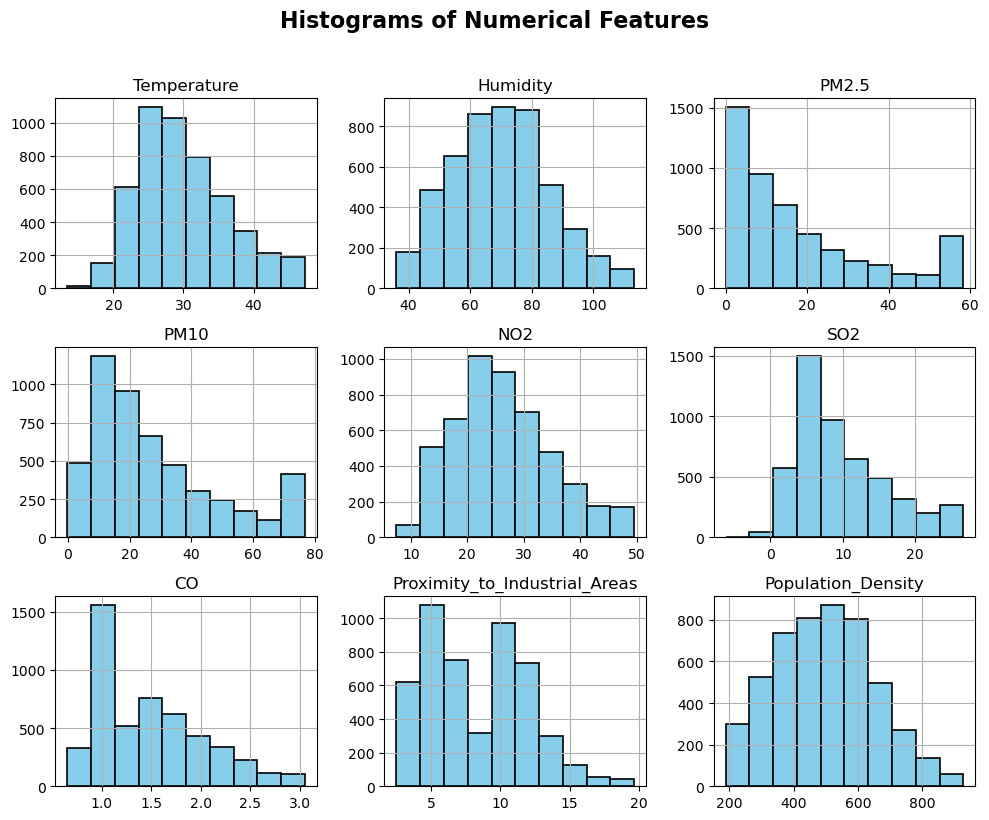

In [14]:
df.hist(figsize=(10, 8), color="skyblue", edgecolor="black", linewidth=1.2)
plt.suptitle("Histograms of Numerical Features", fontsize=16, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

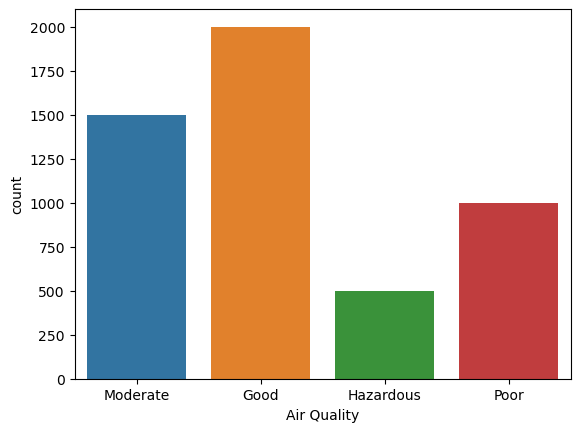

In [16]:
sns.countplot(data=df, x="Air Quality")
plt.show()

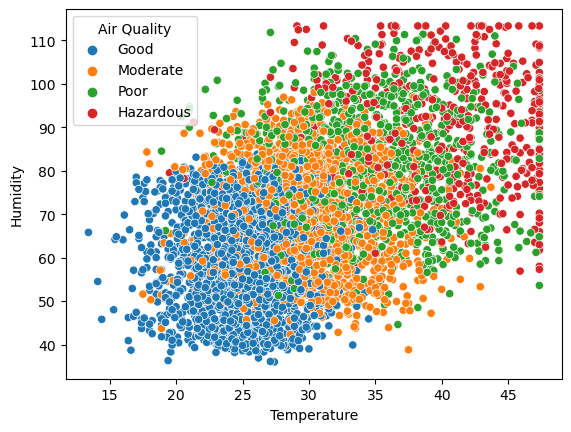

In [19]:
order = ["Good", "Moderate", "Poor", "Hazardous"]

sns.scatterplot(data=df, x="Temperature", y="Humidity", hue="Air Quality", hue_order=order)
plt.show()

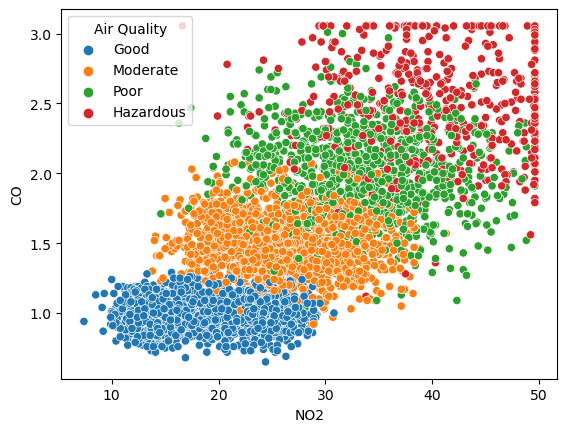

In [24]:
sns.scatterplot(data=df, x="NO2", y="CO", hue="Air Quality", hue_order=order)
plt.show()

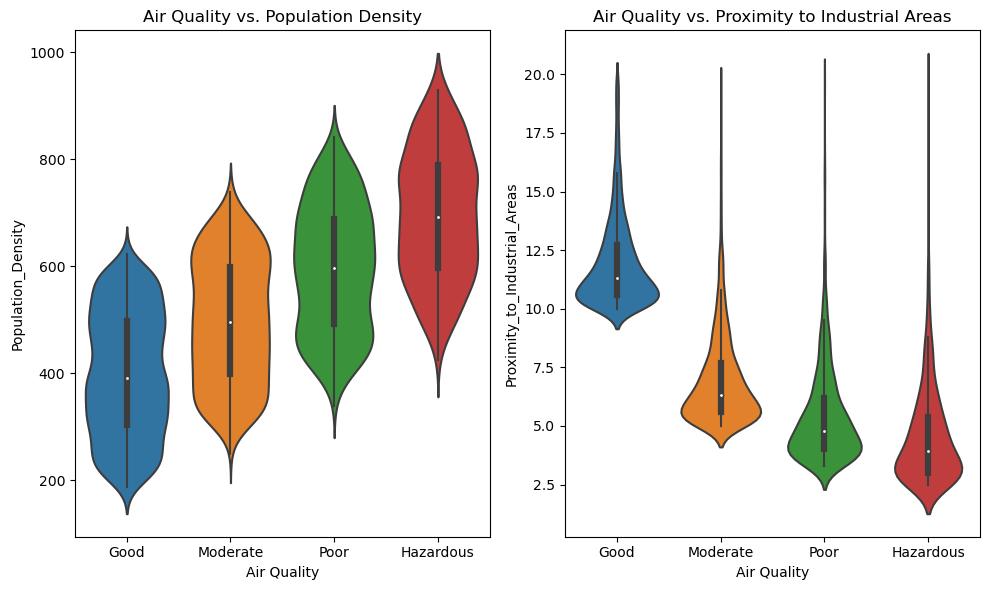

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

sns.violinplot(data=df, x="Air Quality", y="Population_Density", order=order, ax=ax1)
ax1.set_title("Air Quality vs. Population Density")

sns.violinplot(data=df, x="Air Quality", y="Proximity_to_Industrial_Areas", order=order, ax=ax2)
ax2.set_title("Air Quality vs. Proximity to Industrial Areas")

plt.tight_layout()
plt.show()